### Import relevant packages

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Importing the dataset and applying EDA techniques 

In [2]:
computers_data = pd.read_csv('Computer_Data.csv')
computers_data.head(10)

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1
5,6,3695,66,340,16,14,no,no,yes,94,1
6,7,1720,25,170,4,14,yes,no,yes,94,1
7,8,1995,50,85,2,14,no,no,yes,94,1
8,9,2225,50,210,8,14,no,no,yes,94,1
9,10,2575,50,210,4,15,no,no,yes,94,1


In [3]:
computers_data.columns

Index(['Unnamed: 0', 'price', 'speed', 'hd', 'ram', 'screen', 'cd', 'multi',
       'premium', 'ads', 'trend'],
      dtype='object')

In [4]:
computers_data.describe(include='all')

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259,6259,6259,6259.000000,6259.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,no,no,yes,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,3351,5386,5647,NaN,NaN
mean,3130.000000,2219.576610,52.011024,416.601694,8.286947,14.608723,NaN,NaN,NaN,221.301007,15.926985
std,1806.961999,580.803956,21.157735,258.548445,5.631099,0.905115,NaN,NaN,NaN,74.835284,7.873984
min,1.000000,949.000000,25.000000,80.000000,2.000000,14.000000,NaN,NaN,NaN,39.000000,1.000000
25%,1565.500000,1794.000000,33.000000,214.000000,4.000000,14.000000,NaN,NaN,NaN,162.500000,10.000000
50%,3130.000000,2144.000000,50.000000,340.000000,8.000000,14.000000,NaN,NaN,NaN,246.000000,16.000000
75%,4694.500000,2595.000000,66.000000,528.000000,8.000000,15.000000,NaN,NaN,NaN,275.000000,21.500000


### Check for null values and data types

In [5]:
computers_data.isnull().sum()

Unnamed: 0    0
price         0
speed         0
hd            0
ram           0
screen        0
cd            0
multi         0
premium       0
ads           0
trend         0
dtype: int64

In [6]:
computers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 11 columns):
Unnamed: 0    6259 non-null int64
price         6259 non-null int64
speed         6259 non-null int64
hd            6259 non-null int64
ram           6259 non-null int64
screen        6259 non-null int64
cd            6259 non-null object
multi         6259 non-null object
premium       6259 non-null object
ads           6259 non-null int64
trend         6259 non-null int64
dtypes: int64(8), object(3)
memory usage: 538.0+ KB


### Creating dummy variables

In [8]:
computers_data_cd = pd.get_dummies(computers_data['cd'])
computers_data_cd = pd.concat([computers_data_cd,computers_data],axis = 1)
computers_data_cd.drop(['cd'], inplace=True, axis=1)
computers_data_cd.head()

,no,yes,Unnamed: 0,price,speed,hd,ram,screen,multi,premium,ads,trend
0,1,0,1,1499,25,80,4,14,no,yes,94,1
1,1,0,2,1795,33,85,2,14,no,yes,94,1
2,1,0,3,1595,25,170,4,15,no,yes,94,1
3,1,0,4,1849,25,170,8,14,no,no,94,1
4,1,0,5,3295,33,340,16,14,no,yes,94,1


### Dummy variables is not a good approach so mapping ( Yes and No ) to ( 0 and 1 )

In [10]:
computers_data['cd'] = computers_data['cd'].map({'yes': 1, 'no': 0})
computers_data['multi'] = computers_data['multi'].map({'yes': 1, 'no': 0})
computers_data['premium'] = computers_data['premium'].map({'yes': 1, 'no': 0})
computers_data.describe()

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,3130.000000,2219.576610,52.011024,416.601694,8.286947,14.608723,0.464611,0.139479,0.902221,221.301007,15.926985
std,1806.961999,580.803956,21.157735,258.548445,5.631099,0.905115,0.498786,0.346474,0.297040,74.835284,7.873984
min,1.000000,949.000000,25.000000,80.000000,2.000000,14.000000,0.000000,0.000000,0.000000,39.000000,1.000000
25%,1565.500000,1794.000000,33.000000,214.000000,4.000000,14.000000,0.000000,0.000000,1.000000,162.500000,10.000000
50%,3130.000000,2144.000000,50.000000,340.000000,8.000000,14.000000,0.000000,0.000000,1.000000,246.000000,16.000000
75%,4694.500000,2595.000000,66.000000,528.000000,8.000000,15.000000,1.000000,0.000000,1.000000,275.000000,21.500000
max,6259.000000,5399.000000,100.000000,2100.000000,32.000000,17.000000,1.000000,1.000000,1.000000,339.000000,35.000000


In [11]:
computers_data.head(10)

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,0,0,1,94,1
1,2,1795,33,85,2,14,0,0,1,94,1
2,3,1595,25,170,4,15,0,0,1,94,1
3,4,1849,25,170,8,14,0,0,0,94,1
4,5,3295,33,340,16,14,0,0,1,94,1
5,6,3695,66,340,16,14,0,0,1,94,1
6,7,1720,25,170,4,14,1,0,1,94,1
7,8,1995,50,85,2,14,0,0,1,94,1
8,9,2225,50,210,8,14,0,0,1,94,1
9,10,2575,50,210,4,15,0,0,1,94,1


In [12]:
computers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 11 columns):
Unnamed: 0    6259 non-null int64
price         6259 non-null int64
speed         6259 non-null int64
hd            6259 non-null int64
ram           6259 non-null int64
screen        6259 non-null int64
cd            6259 non-null int64
multi         6259 non-null int64
premium       6259 non-null int64
ads           6259 non-null int64
trend         6259 non-null int64
dtypes: int64(11)
memory usage: 538.0 KB


In [14]:
computers_data = computers_data.drop(computers_data.columns[[0]],axis=1)

In [15]:
computers_data.corr()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
price,1.000000,0.300976,0.430258,0.622748,0.296041,0.197343,-0.016651,-0.080696,0.054540,-0.199987
speed,0.300976,1.000000,0.372304,0.234760,0.189074,0.258260,0.084172,0.114208,-0.215232,0.405438
hd,0.430258,0.372304,1.000000,0.777726,0.232802,0.503570,0.092805,0.196924,-0.323222,0.577790
ram,0.622748,0.234760,0.777726,1.000000,0.208954,0.438504,0.045497,0.197145,-0.181670,0.276844
screen,0.296041,0.189074,0.232802,0.208954,1.000000,0.129488,-0.001740,0.018745,-0.093919,0.188614
cd,0.197343,0.258260,0.503570,0.438504,0.129488,1.000000,0.432179,0.216077,-0.061091,0.445780
multi,-0.016651,0.084172,0.092805,0.045497,-0.001740,0.432179,1.000000,0.124775,-0.030394,0.210907
premium,-0.080696,0.114208,0.196924,0.197145,0.018745,0.216077,0.124775,1.000000,-0.152023,0.042107
ads,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,-0.061091,-0.030394,-0.152023,1.000000,-0.318553
trend,-0.199987,0.405438,0.577790,0.276844,0.188614,0.445780,0.210907,0.042107,-0.318553,1.000000


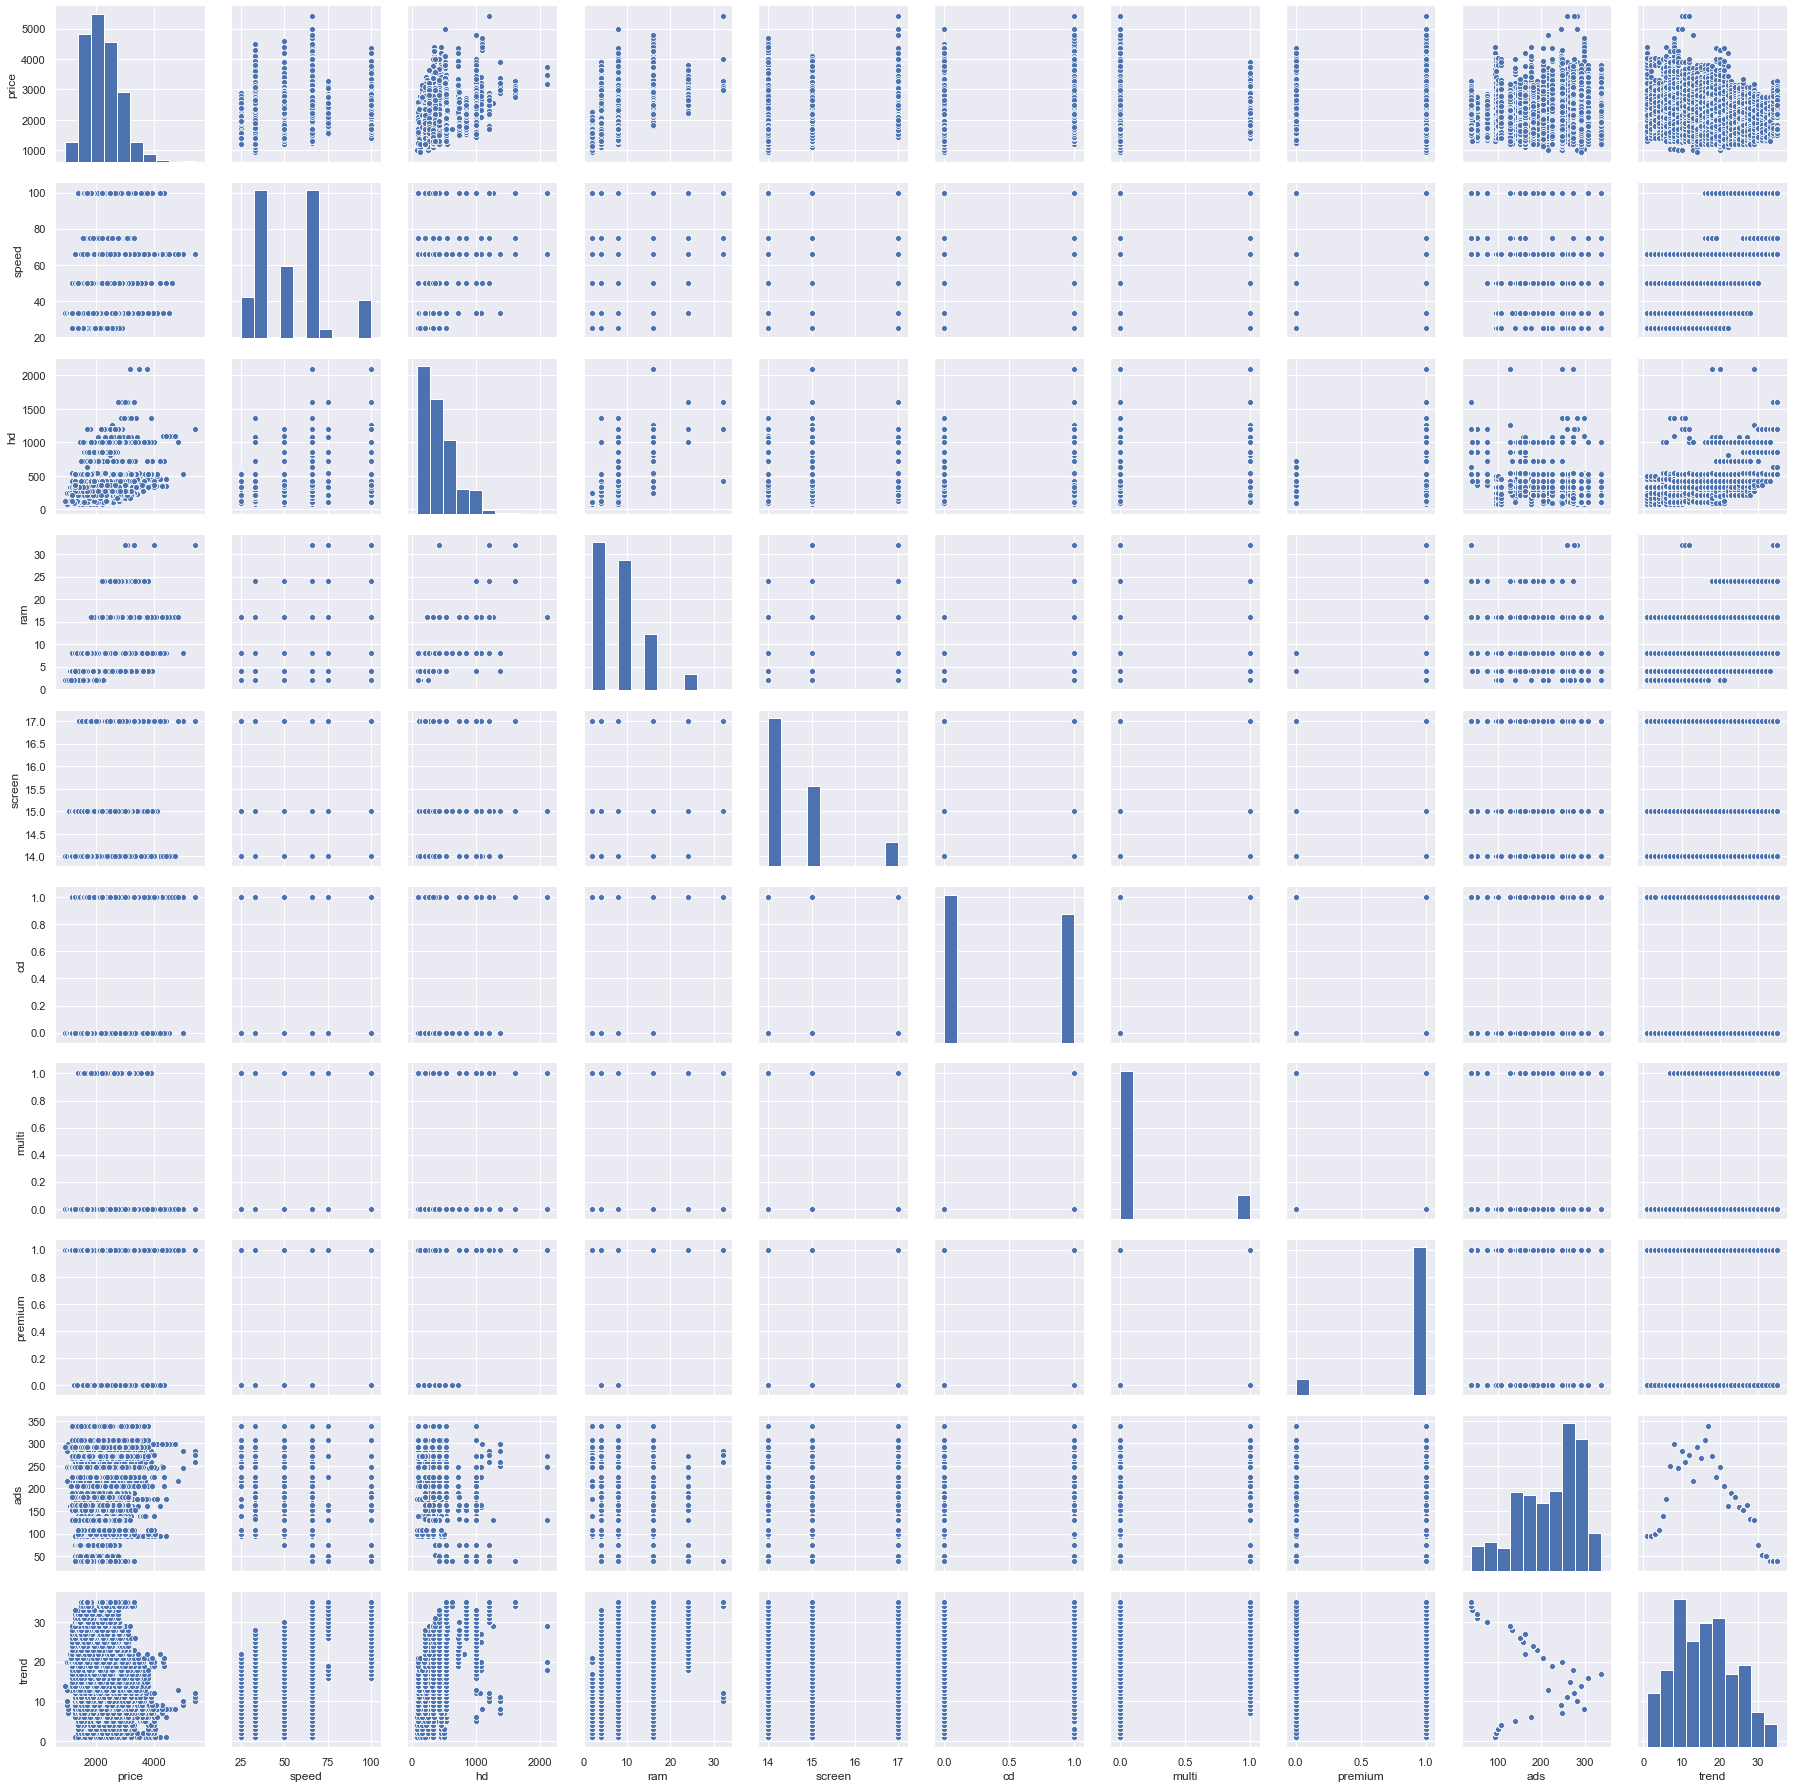

In [25]:
sns.pairplot(computers_data)
plt.show()

In [19]:
ml1 = smf.ols('price~speed+hd+ram+screen+cd+multi+premium+ads+trend',data=computers_data).fit()
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     2399.
Date:                Wed, 13 May 2020   Prob (F-statistic):               0.00
Time:                        01:51:32   Log-Likelihood:                -44039.
No. Observations:                6259   AIC:                         8.810e+04
Df Residuals:                    6249   BIC:                         8.817e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    307.9880     60.353      5.103      0.000     189.675     426.301
speed          9.3203      0.185     50.364      0.000       8.958       9.683
hd             0.7818      0.028     28.311      0.000       0.728       0.836
ram           48.2560      1.066     45.265      0.000      46.166      50.346
screen       123.0890      3.999     30.776      0.000     115.249     130.929
cd            60.9167      9.516      6.402      0.000      42.263      79.571
multi        104.3238     11.413      9.141      0.000      81.951     126.697
premium     -509.2247     12.342    -41.259      0.000    -533.420    -485.030
ads            0.6573      0.051     12.809      0.000       0.557       0.758
trend        -51.8496      0.629    -82.470      0.000     -53.082     -50.617
==============================================================================
Omnibus:                     1014.821   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3190.887
Skew:                           0.832   Prob(JB):                         0.00
Kurtosis:                       6.077   Cond. No.                     9.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Splitting data into training and testing data in 80-20 ratio

In [31]:
from sklearn.model_selection import train_test_split

computers_train, computers_test = train_test_split(computers_data, test_size=0.2)

model_train = smf.ols('price~speed+hd+ram+screen+cd+multi+premium+ads+trend', data=computers_train).fit()

train_predict = model_train.predict(computers_train)

train_residual = train_predict - computers_train.price

computers_train.head(15)

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
4886,2543,66,720,16,15,1,1,1,191,23
5160,1799,66,545,8,15,1,0,1,182,24
4337,1469,33,212,4,14,0,0,1,248,20
5606,2124,75,545,8,17,1,1,1,163,27
292,2495,50,245,8,14,0,0,1,108,4
5135,2258,66,730,8,17,1,0,1,182,24
2314,1720,33,424,4,14,0,0,1,275,12
764,1599,25,170,4,14,0,0,1,249,7
738,2495,25,452,16,14,0,0,1,249,7
2986,1399,50,260,4,14,0,0,1,267,15


In [33]:
import numpy as np
train_rmse = np.sqrt(np.mean(train_residual*train_residual))
train_rmse

277.626002031833

In [35]:
test_predict = model_train.predict(computers_test)
test_residual = test_predict - computers_test.price
computers_test.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
6049,1354,66,528,4,14,0,0,1,52,31
3339,3239,66,424,8,15,0,0,0,307,16
4077,2149,66,420,8,15,1,0,1,225,19
5554,1299,66,340,4,14,1,0,1,163,27
1369,2899,50,240,4,14,0,0,0,246,9


In [36]:
test_rmse = np.sqrt(np.mean(test_residual*test_residual))
test_rmse

265.0048251905736